Jelle, July 2016

This notebook contains some basic tests to check the base model is correctly configured.

In [2]:
import numpy as np
from tqdm import tqdm

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rc('font', size=16)
plt.rcParams['figure.figsize'] = (12.0, 10.0)    # resize plots

from blueice.inference import bestfit_scipy
from blueice.model import Model

from laidbax.base_model import config as base_config

In [3]:
#Create the model from scratch (takes a minute or more to sample the PDFs the first time you run this)
m = Model(base_config)

Energy spectra of sources included in model:

(1e-11, 0.01)

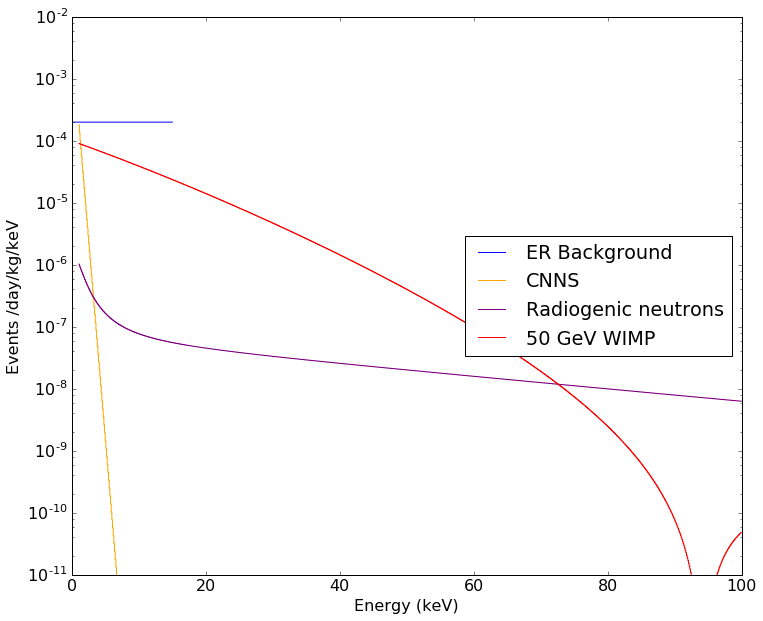

In [4]:
for s in m.sources:
    s.energy_distribution.plot(label=s.label, color=s.color)
plt.yscale('log')

plt.ylabel('Events /day/kg/keV')
plt.xlabel("Energy (keV)")
plt.legend(loc='center right')
plt.ylim(1e-11, 1e-2)

Yields used for S1 and S2 generation:

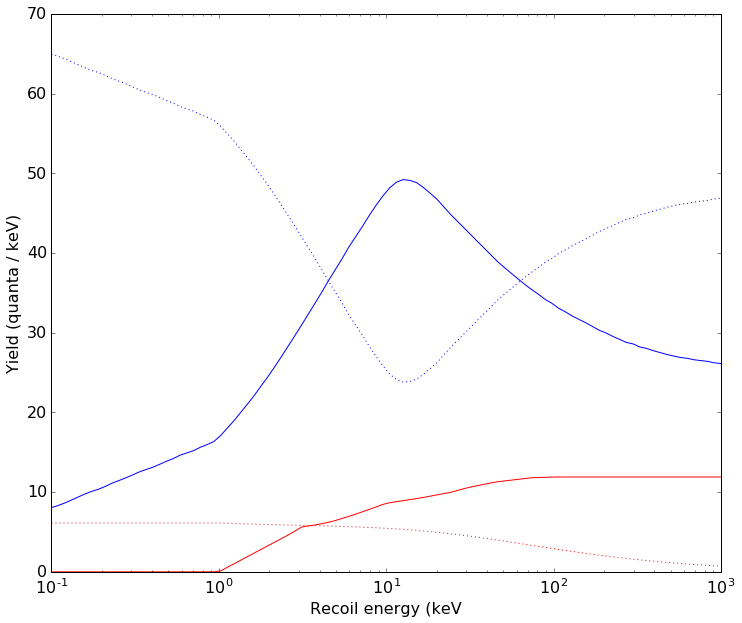

In [6]:
s = m.sources[0]
e= np.logspace(-1, 3, 100)
for recoil_type, color in (('er', 'b'), ('nr', 'r')):
        for quantum_type, linestyle in (('photon', '-'), ('electron', ':')):
            plt.plot(e, s.yield_at(e,  recoil_type, quantum_type), c=color, linestyle=linestyle)
plt.xscale('log')
plt.xlabel("Recoil energy (keV")
plt.ylabel("Yield (quanta / keV)")
plt.show()

What fraction of the total events produced an event inside the analysis space (as opposed to an event out of range or no event at all)?

In [7]:
print([(s.name, s.fraction_in_range) for s in m.sources])

[('er_bg', 0.50479390476190478), ('cnns', 0.010154166666666667), ('radiogenics', 0.50497000000000003), ('wimp_50gev', 0.71687749999999995)]


Simulate a single toy data set:

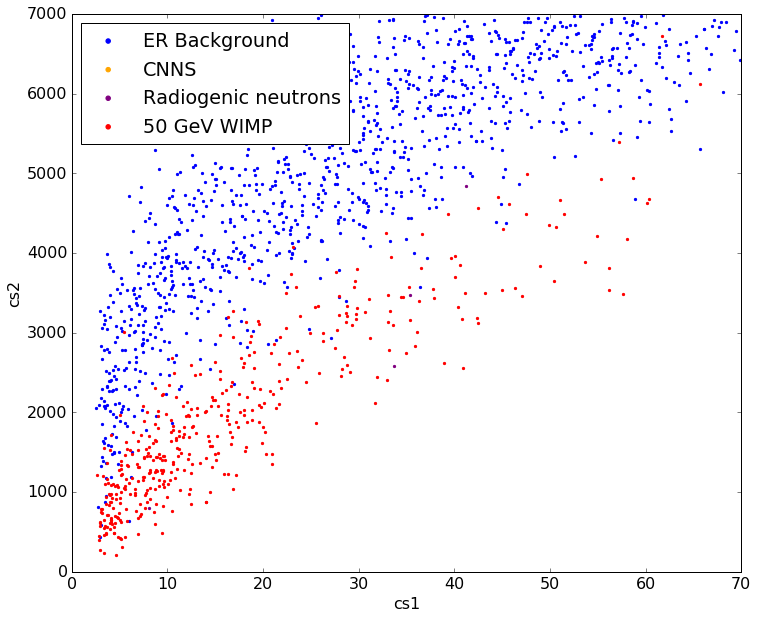

In [8]:
d = m.simulate()
m.show(d)
plt.legend(loc='upper left', scatterpoints=1, markerscale=2)